<a href="https://colab.research.google.com/github/nabeelnazeer/Reggresion-anaylsis/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/Untitled spreadsheet - Sheet2.csv')

In [ ]:
df.head
print(df.head)


<bound method NDFrame.head of      x     y
0  -10 -36.5
1   -9 -33.5
2   -8 -31.5
3   -7 -24.5
4   -6 -22.5
5   -5 -18.5
6   -4 -15.5
7   -3  -9.5
8   -2  -5.5
9   -1  -3.5
10   0   3.5
11   1   6.5
12   2   9.5
13   3  12.5
14   4  18.5
15   5  23.5
16   6  24.5
17   7  32.5
18   8  33.5
19   9  38.5
20  10  42.5>


In [ ]:
print(x)

NameError: name 'x' is not defined

In [ ]:
print(y)

NameError: name 'y' is not defined

In [ ]:
print(mc_set)

NameError: name 'mc_set' is not defined

In [ ]:
print(e)

NameError: name 'e' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

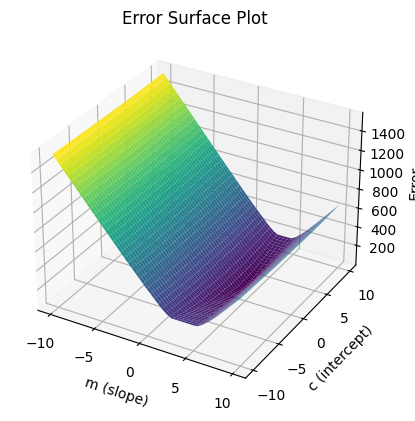

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('/content/Untitled spreadsheet - Sheet2.csv')

# Define ranges for m and c
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)

# Extract x and y values from the DataFrame
x_values = df.iloc[:, 0].values
y_values = df.iloc[:, 1].values

# Create a mesh grid for m and c values
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate the errors
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        mi = M[i, j]
        ci = C[i, j]
        predicted_y = mi * x_values + ci
        errors[i, j] = np.sum(np.abs(y_values - predicted_y))  # Sum of absolute errors

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(M, C, errors, cmap='viridis')

# Set labels and title
ax.set_xlabel('m (slope)')
ax.set_ylabel('c (intercept)')
ax.set_zlabel('Error')
plt.title('Error Surface Plot')

# Show the plot
plt.show()




In [ ]:
# prompt: now i want to use gradient descent algorithm to find the optimum m and c make the syaring values randomly from m and c set

import pandas as pd
import numpy as np
import random

# Load the data
df = pd.read_csv('/content/Untitled spreadsheet - Sheet2.csv')

# Extract x and y values from the DataFrame
x_values = df.iloc[:, 0].values
y_values = df.iloc[:, 1].values

# Define the learning rate and number of iterations
learning_rate = 0.001
num_iterations = 1000

# Initialize m and c randomly within the specified ranges
m = random.choice(m_values)
c = random.choice(c_values)

# Gradient Descent algorithm
for i in range(num_iterations):
    y_predicted = m * x_values + c
    error = y_values - y_predicted

    # Calculate gradients
    m_gradient = -2 * np.sum(error * x_values) / len(x_values)
    c_gradient = -2 * np.sum(error) / len(x_values)

    # Update m and c
    m = m - learning_rate * m_gradient
    c = c - learning_rate * c_gradient

print("Optimum m:", m)
print("Optimum c:", c)

# Calculate the error for the optimal m and c
y_predicted = m * x_values + c
error = y_values - y_predicted
mse = np.mean(error ** 2)

print("Mean Squared Error (MSE):", mse)


Optimum m: 4.014285714285709
Optimum c: 1.441152349243785
Mean Squared Error (MSE): 1.8307438108813683


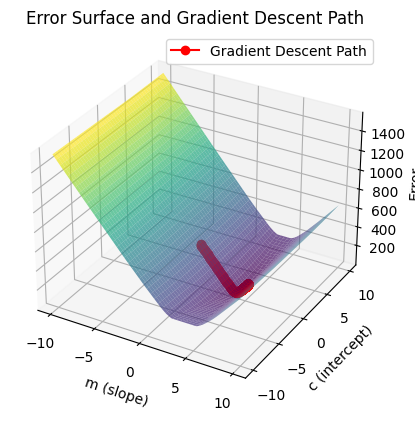

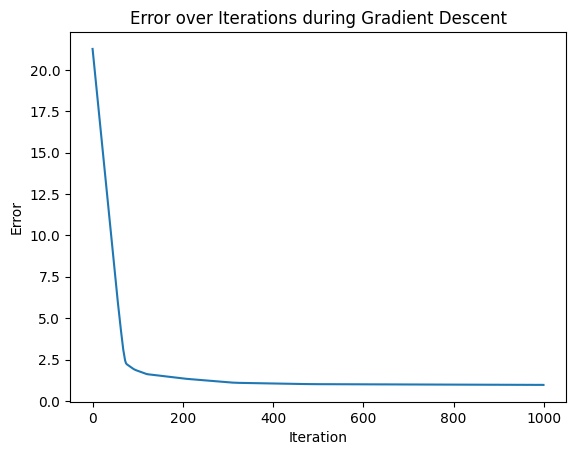

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('/content/Untitled spreadsheet - Sheet2.csv')

# Define ranges for m and c
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)

# Extract x and y values from the DataFrame
x_values = df.iloc[:, 0].values
y_values = df.iloc[:, 1].values

# Create a mesh grid for m and c values
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate the errors for the entire grid
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        mi = M[i, j]
        ci = C[i, j]
        predicted_y = mi * x_values + ci
        errors[i, j] = np.sum(np.abs(y_values - predicted_y))  # Mean Absolute Error (MAE)

# Function to compute MAE and its gradients
def compute_error_and_gradients(m, c, x_values, y_values):
    N = len(y_values)
    predicted_y = m * x_values + c
    error = np.sum(np.abs(y_values - predicted_y)) / N  # Mean Absolute Error
    error_gradient_m = -np.sum(np.sign(y_values - predicted_y) * x_values) / N  # Gradient w.r.t. m
    error_gradient_c = -np.sum(np.sign(y_values - predicted_y)) / N  # Gradient w.r.t. c
    return error, error_gradient_m, error_gradient_c

# Gradient descent parameters
learning_rate = 0.01
num_iterations = 1000
m_current = 0  # Starting value for m (slope)
c_current = 0  # Starting value for c (intercept)

# To store the path of m and c values
m_history = [m_current]
c_history = [c_current]
error_history = []

# Gradient descent loop
for i in range(num_iterations):
    error, grad_m, grad_c = compute_error_and_gradients(m_current, c_current, x_values, y_values)
    m_current -= learning_rate * grad_m  # Update m
    c_current -= learning_rate * grad_c  # Update c

    # Save the values at each iteration for plotting
    m_history.append(m_current)
    c_history.append(c_current)
    error_history.append(error)



# Create the 3D plot of the error surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, errors, cmap='viridis', alpha=0.7)

# Plot the path of gradient descent on the surface
m_history = np.array(m_history)
c_history = np.array(c_history)
error_path = np.zeros(m_history.shape)
for i in range(len(m_history)):
    predicted_y = m_history[i] * x_values + c_history[i]
    error_path[i] = np.sum(np.abs(y_values - predicted_y))  # Error at each step

ax.plot(m_history, c_history, error_path, color='r', marker='o', label='Gradient Descent Path')

# Set labels and title
ax.set_xlabel('m (slope)')
ax.set_ylabel('c (intercept)')
ax.set_zlabel('Error')
plt.title('Error Surface and Gradient Descent Path')
plt.legend()
plt.show()

# Plot error over iterations
plt.figure()
plt.plot(error_history)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error over Iterations during Gradient Descent')
plt.show()


In [ ]:
# prompt: now using plotily make the exact 3d surface plot with gradient descent path interactive

import plotly.graph_objects as go

# Create the 3D plot of the error surface
fig = go.Figure(data=[go.Surface(z=errors, x=M, y=C, colorscale='viridis', opacity=0.7)])

# Plot the path of gradient descent on the surface
fig.add_trace(go.Scatter3d(x=m_history, y=c_history, z=error_path,
                         mode='lines+markers',
                         marker=dict(size=4, color='red'),
                         line=dict(color='red', width=2),
                         name='Gradient Descent Path'))

# Set labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='m (slope)',
        yaxis_title='c (intercept)',
        zaxis_title='Error'),
    title='Error Surface and Gradient Descent Path',
    width=800,
    height=600
)

fig.show()


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating synthetic linear data
np.random.seed(42)
N = 100
x_values = 2 * np.random.rand(N, 1)
y_values = 4 + 3 * x_values + np.random.randn(N, 1)  # Linear equation: y = 4 + 3x + noise

# Convert to DataFrame for convenience
df = pd.DataFrame(np.hstack((x_values, y_values)), columns=['x', 'y'])


In [37]:
# Mini-batch Gradient Descent
def mini_batch_gradient_descent(x, y, batch_size=10, learning_rate=0.01, num_iterations=1000):
    m, c = 0.0, 0.0  # Initial parameters
    N = len(y)

    # For plotting
    m_history, c_history, error_history = [], [], []

    for i in range(num_iterations):
        # Shuffle the data
        indices = np.random.permutation(N)
        x_shuffled, y_shuffled = x[indices], y[indices]

        # Mini-batch gradient descent
        for j in range(0, N, batch_size):
            x_batch = x_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]
            predicted_y = m * x_batch + c

            error = np.sum(np.abs(y_batch - predicted_y)) / len(y_batch)
            error_history.append(error)

            # Gradients
            error_gradient_m = -np.sum(np.sign(y_batch - predicted_y) * x_batch) / len(y_batch)
            error_gradient_c = -np.sum(np.sign(y_batch - predicted_y)) / len(y_batch)

            # Update parameters
            m -= learning_rate * error_gradient_m
            c -= learning_rate * error_gradient_c

            # Store history for plotting
            m_history.append(m)
            c_history.append(c)

    return m, c, m_history, c_history, error_history


In [38]:
# Gradient Descent with Momentum
def gradient_descent_momentum(x, y, learning_rate=0.01, num_iterations=1000, momentum=0.9):
    m, c = 0.0, 0.0  # Initial parameters
    v_m, v_c = 0.0, 0.0  # Initialize momentum

    # For plotting
    m_history, c_history, error_history = [], [], []

    for i in range(num_iterations):
        predicted_y = m * x + c

        error = np.sum(np.abs(y - predicted_y)) / len(y)
        error_history.append(error)

        # Gradients
        error_gradient_m = -np.sum(np.sign(y - predicted_y) * x) / len(y)
        error_gradient_c = -np.sum(np.sign(y - predicted_y)) / len(y)

        # Update momentum
        v_m = momentum * v_m - learning_rate * error_gradient_m
        v_c = momentum * v_c - learning_rate * error_gradient_c

        # Update parameters
        m += v_m
        c += v_c

        # Store history for plotting
        m_history.append(m)
        c_history.append(c)

    return m, c, m_history, c_history, error_history


In [39]:
# Create a meshgrid for the error surface
m_values = np.linspace(-10, 10, 100)
c_values = np.linspace(-10, 10, 100)
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate errors for the surface
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        predicted_y = M[i, j] * x_values + C[i, j]
        errors[i, j] = np.sum(np.abs(y_values - predicted_y))

# Plotting function
def plot_results(m_history, c_history, error_history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(error_history)
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Error')
    plt.grid(True)
    plt.show()

    # Plot error surface and paths
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(M, C, errors, cmap='viridis', alpha=0.7)

    ax.plot(m_history, c_history, error_history[:len(m_history)], color='r', marker='o', label='Gradient Descent Path')
    ax.set_xlabel('m (slope)')
    ax.set_ylabel('c (intercept)')
    ax.set_zlabel('Error')
    plt.title('Error Surface and Gradient Descent Path')
    plt.legend()
    plt.show()


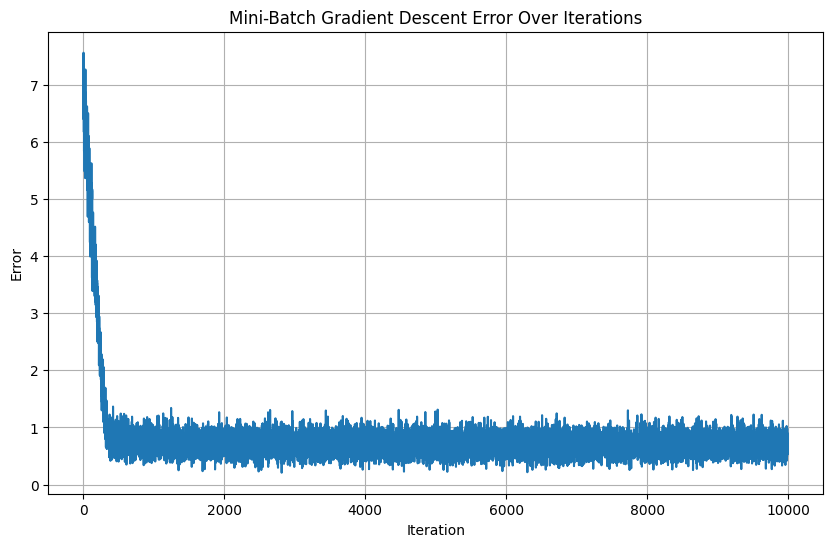

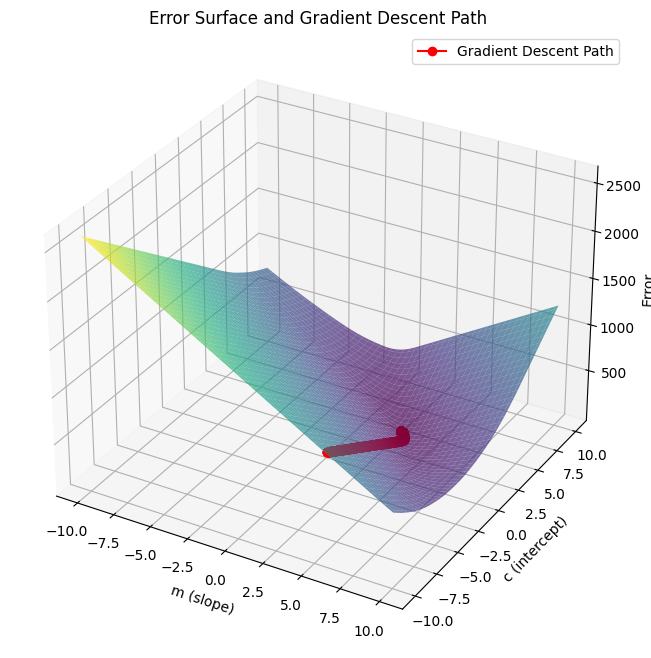

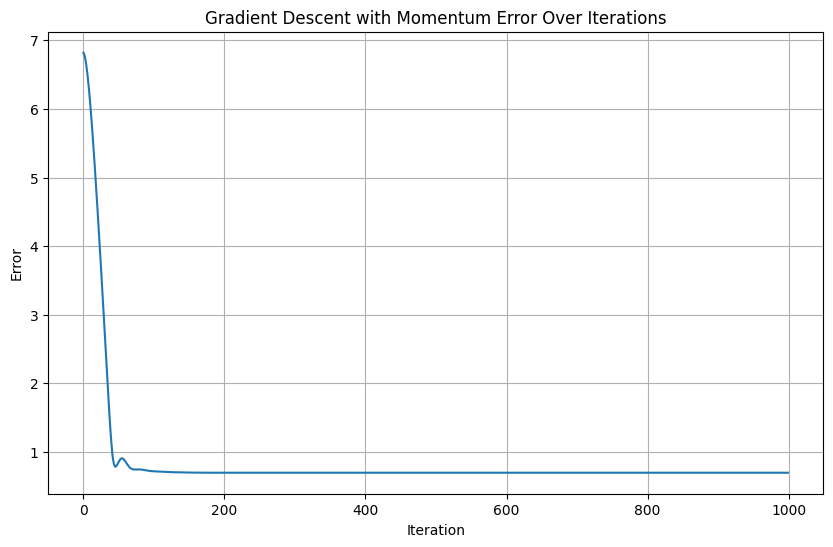

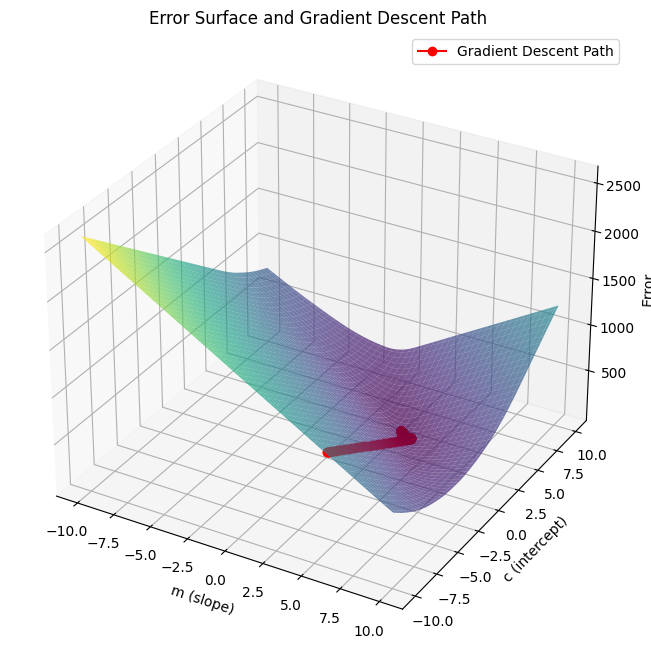

In [40]:
# Mini-Batch Gradient Descent
m_mini_batch, c_mini_batch, m_history_mini_batch, c_history_mini_batch, error_history_mini_batch = mini_batch_gradient_descent(x_values, y_values)

# Plot Mini-Batch Results
plot_results(m_history_mini_batch, c_history_mini_batch, error_history_mini_batch, "Mini-Batch Gradient Descent Error Over Iterations")

# Gradient Descent with Momentum
m_momentum, c_momentum, m_history_momentum, c_history_momentum, error_history_momentum = gradient_descent_momentum(x_values, y_values)

# Plot Momentum Results
plot_results(m_history_momentum, c_history_momentum, error_history_momentum, "Gradient Descent with Momentum Error Over Iterations")
